In [3]:
# （1）构建函数模型
# 这里注意：当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import warnings
warnings.filterwarnings('ignore') 
os.chdir("E:\\300 数据时代\\数据分析")
person_p = [0.899/90 for i in range(100)]
for i in [1,11,21,31,41,51,61,71,81,91]:
    person_p[i-1] = 0.0101
# 设置概率

def game3(data, roundi):
    round_i = pd.DataFrame({'pre_round':data[roundi-1],'lost':1}) # 设定每轮分配财富之前的情况
    choice_i = pd.Series(np.random.choice(person_n,100, p = person_p))
    gain_i = pd.DataFrame({'gain':choice_i.value_counts()})       # 这一轮中每个人随机指定给“谁”1元钱，并汇总这一轮每个人的盈利情况
    round_i = round_i.join(gain_i)
    round_i.fillna(0,inplace = True)
    return round_i['pre_round'] -  round_i['lost'] + round_i['gain']
    # 合并数据，得到这一轮财富分配的结果
print('finished!')

finished!


In [5]:
# （2）运行模型，模拟财富分配

person_n = [x for x in range(1,101)]
fortune = pd.DataFrame([100 for i in range(100)], index = person_n)
fortune.index.name = 'id'
# 设定初始参数：游戏玩家100人，起始资金100元

starttime = time.time()                     # 模型开始时间
for round in range(1,17001):
    fortune[round] = game3(fortune,round)   # 进行17000轮随机分配模拟
game3_result = fortune.T                    # 转置后得到结果数据 → 列为每一个人的id，行为每一轮的财富分配结果   
endtime = time.time()                       # 模型结束时间
print('模型总共用时%i秒' % (endtime - starttime))
# 计算时间

game3_result.tail()
# 查看最后5条数据

模型总共用时92秒


id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
16996,94.0,82.0,42.0,195.0,39.0,259.0,204.0,151.0,-39.0,118.0,...,514.0,233.0,201.0,167.0,48.0,28.0,18.0,-215.0,-37.0,273.0
16997,94.0,81.0,43.0,195.0,40.0,259.0,205.0,151.0,-39.0,120.0,...,515.0,232.0,201.0,166.0,48.0,28.0,19.0,-215.0,-38.0,273.0
16998,93.0,81.0,43.0,195.0,39.0,259.0,205.0,152.0,-39.0,121.0,...,514.0,231.0,202.0,165.0,48.0,27.0,18.0,-214.0,-37.0,272.0
16999,93.0,80.0,42.0,195.0,38.0,259.0,204.0,153.0,-40.0,120.0,...,513.0,230.0,201.0,164.0,49.0,27.0,18.0,-215.0,-36.0,271.0
17000,93.0,81.0,43.0,195.0,37.0,260.0,205.0,153.0,-39.0,120.0,...,512.0,229.0,201.0,166.0,49.0,28.0,19.0,-216.0,-35.0,271.0


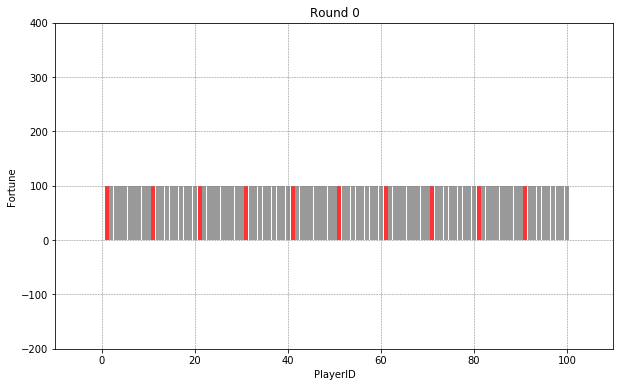

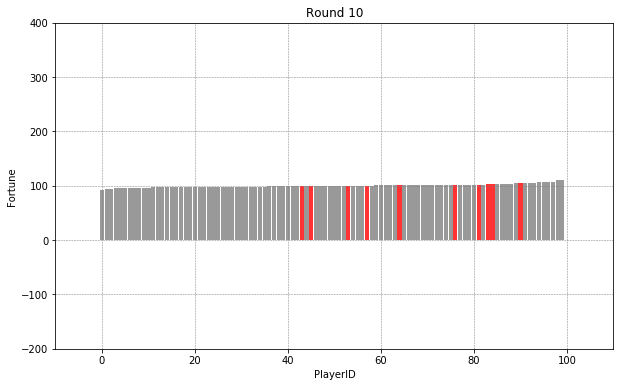

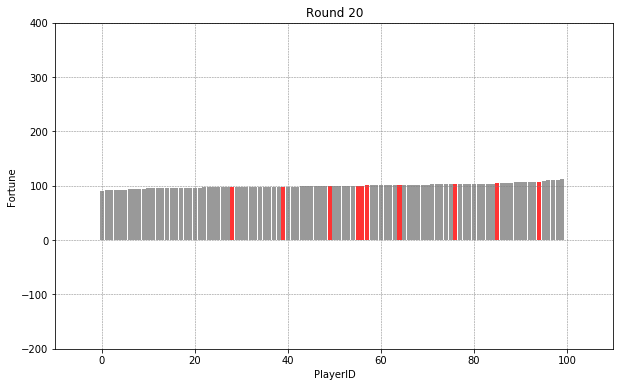

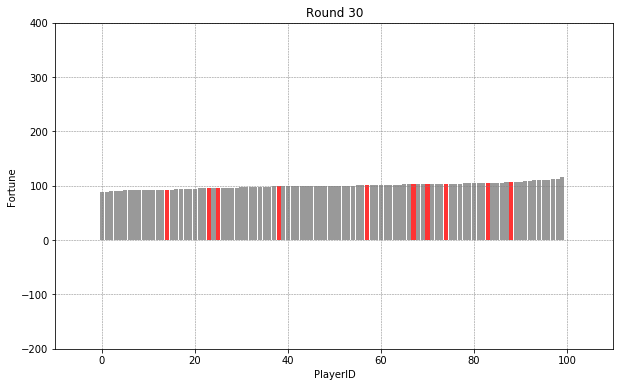

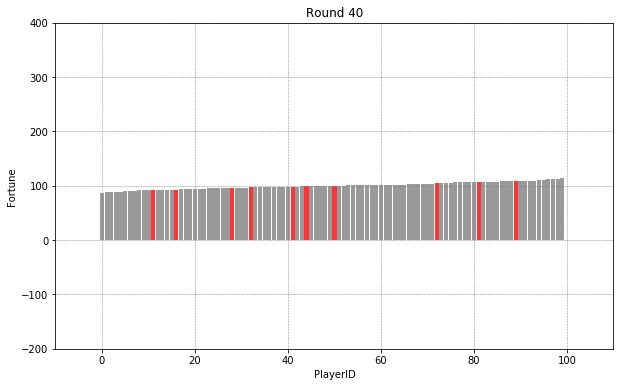

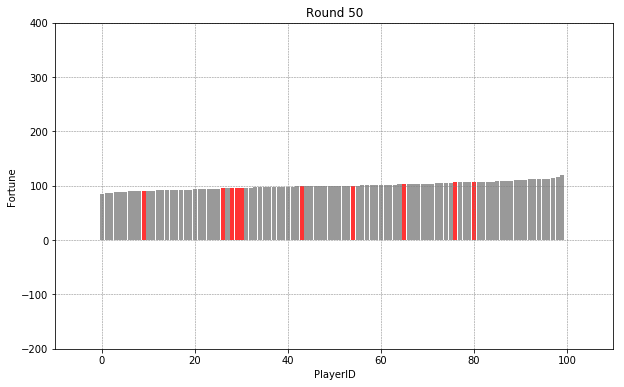

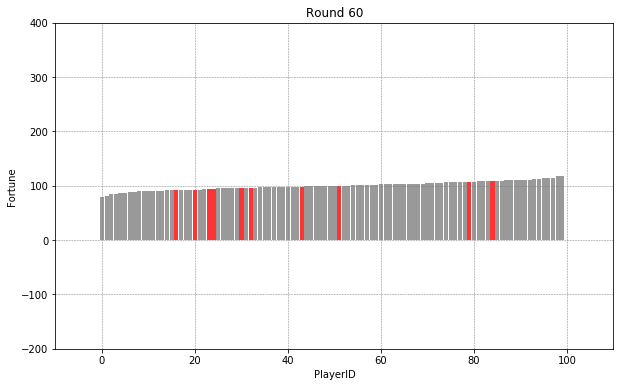

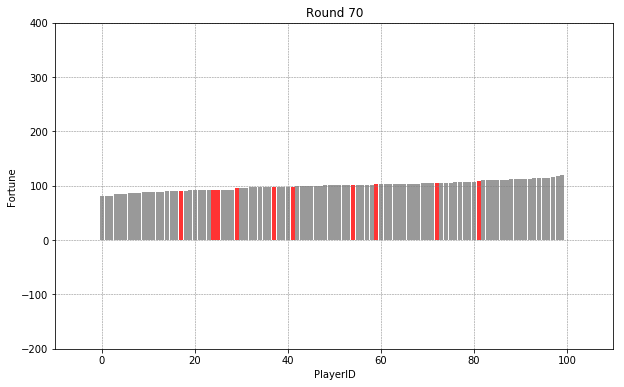

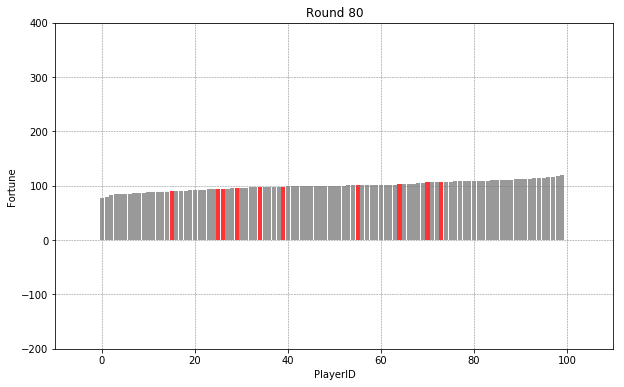

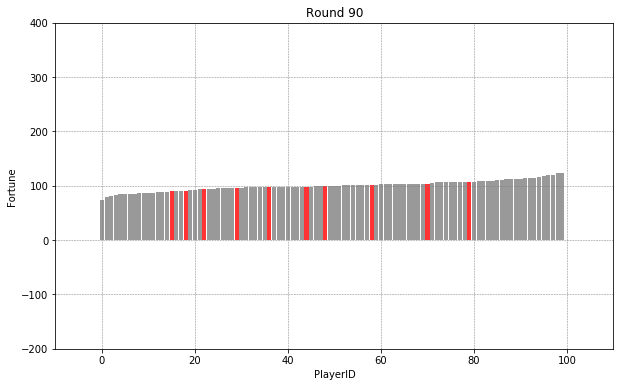

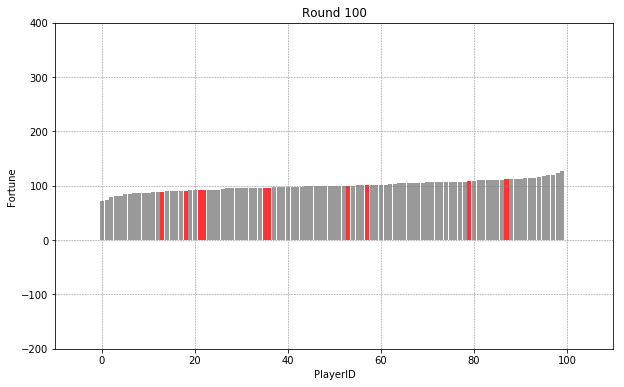

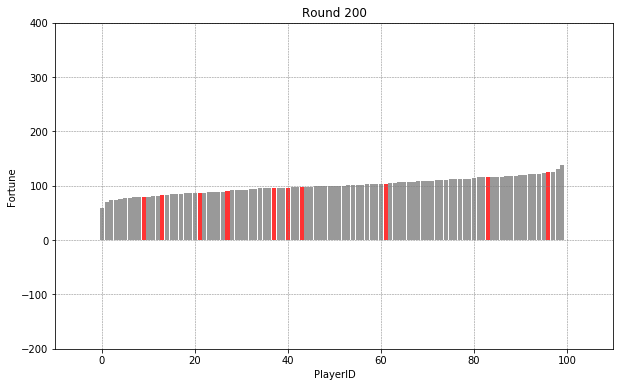

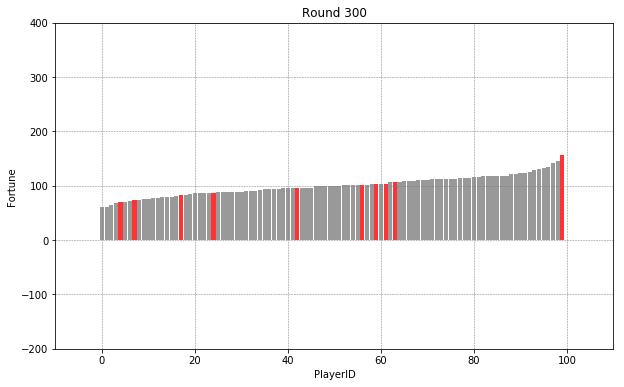

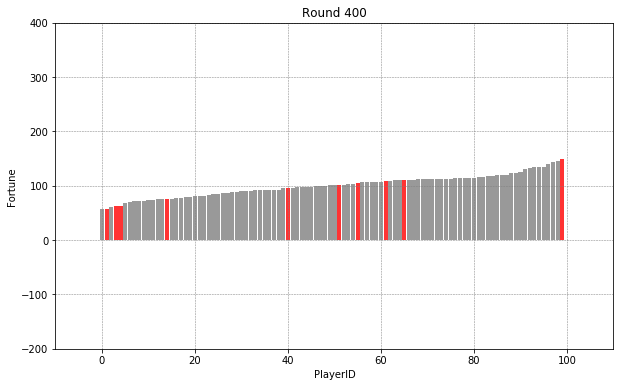

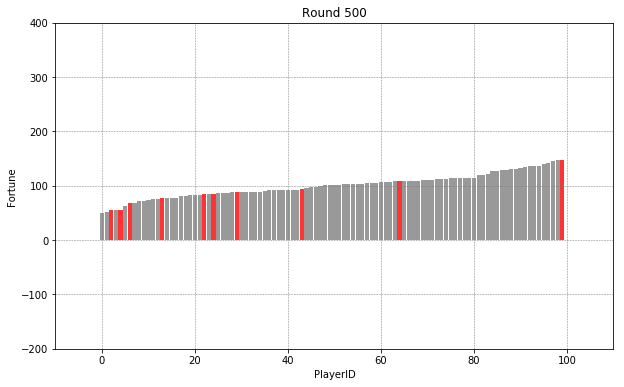

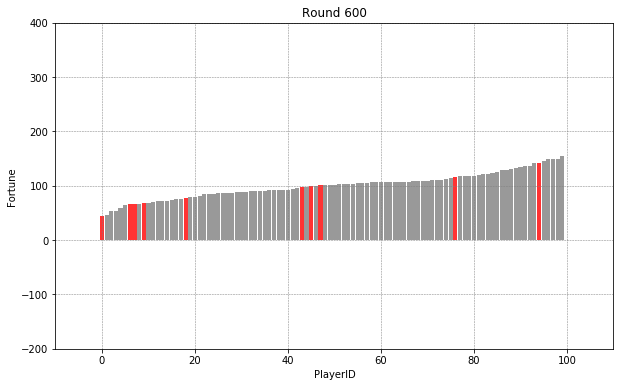

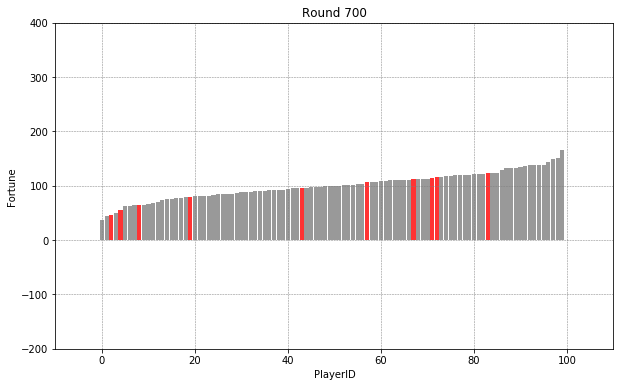

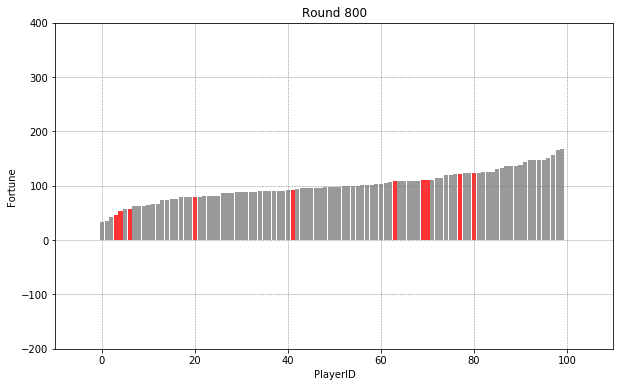

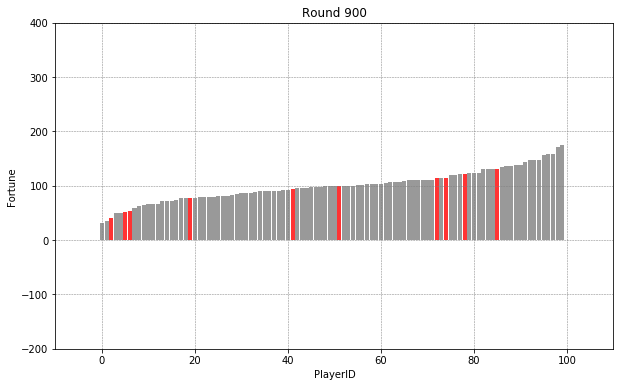

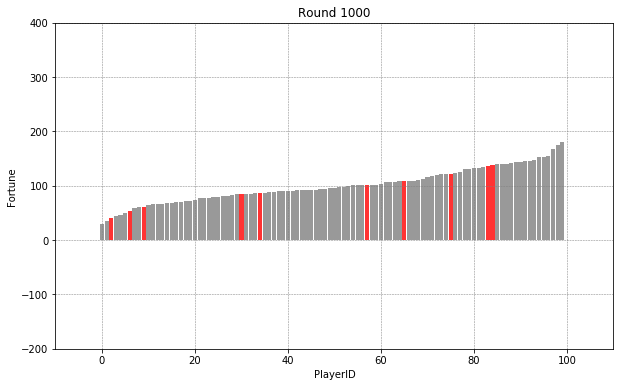

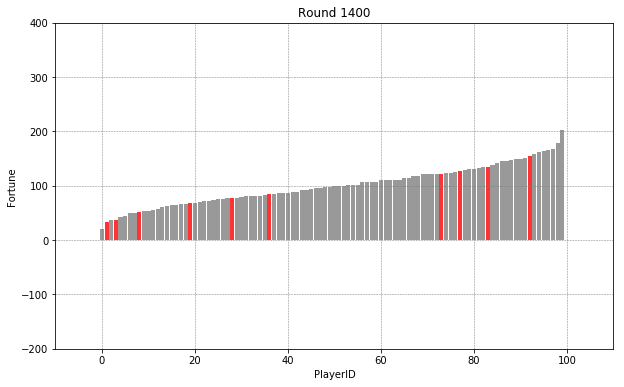

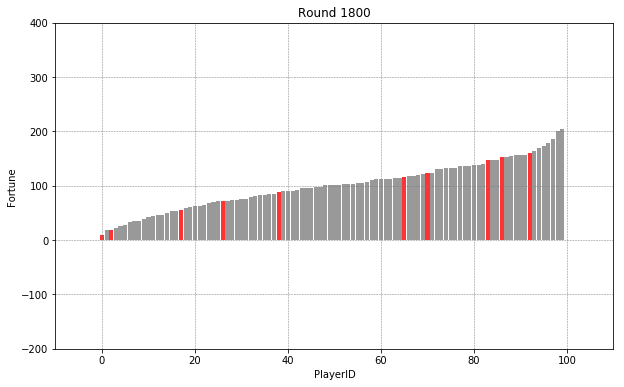

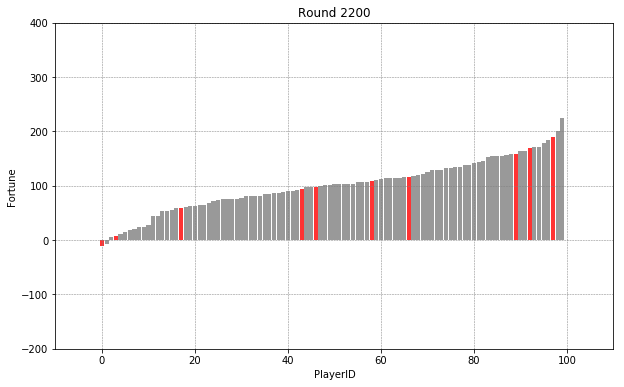

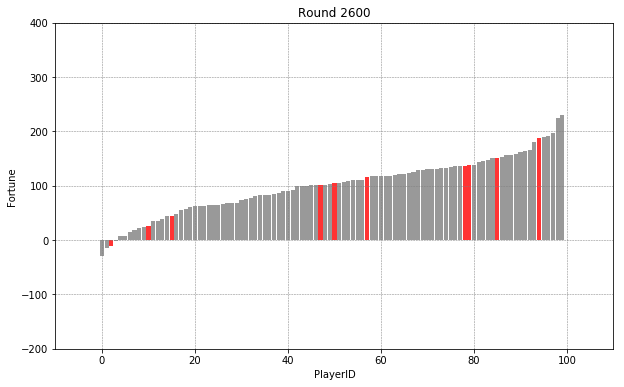

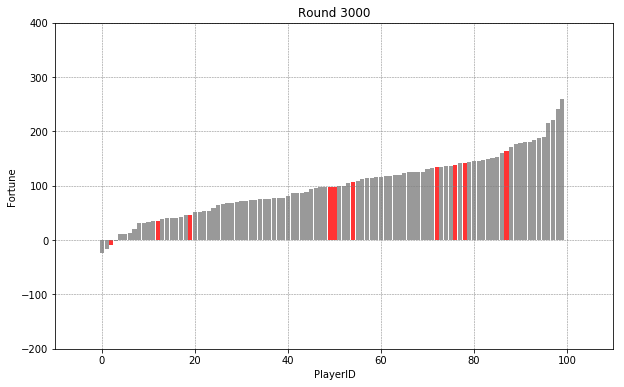

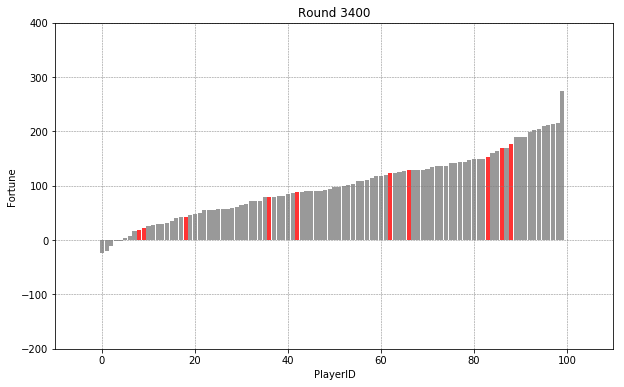

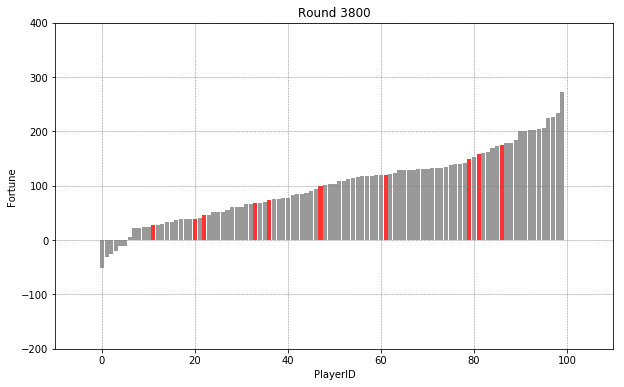

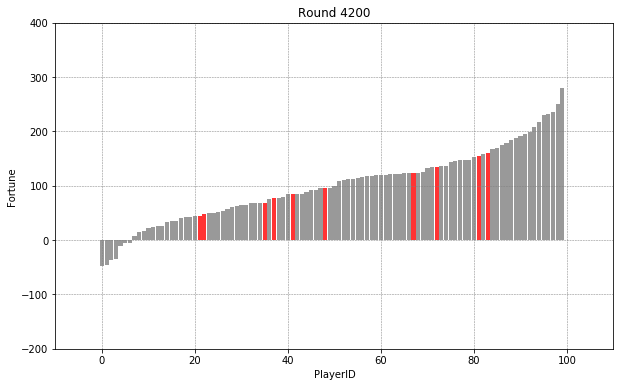

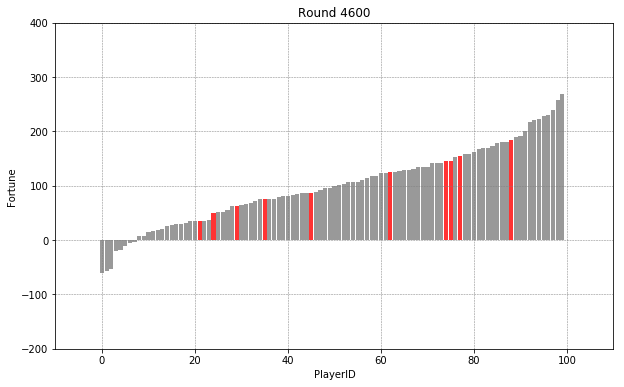

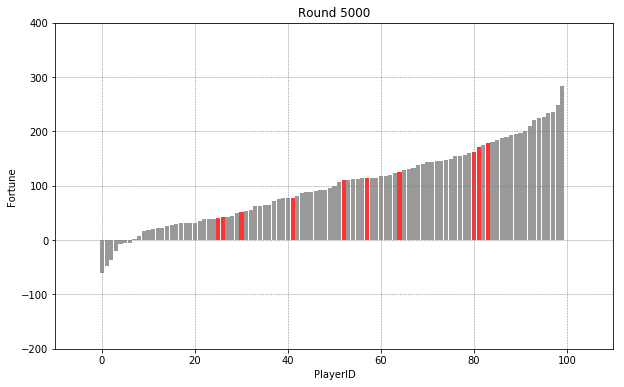

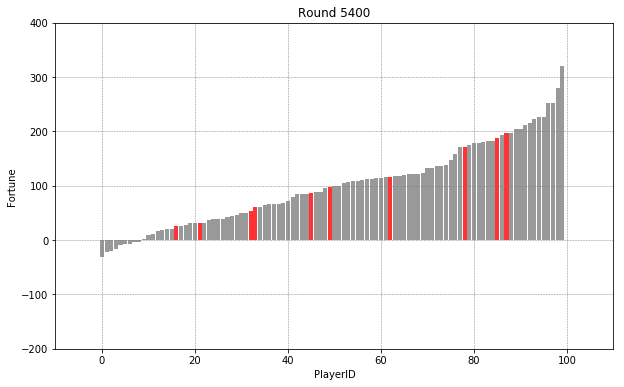

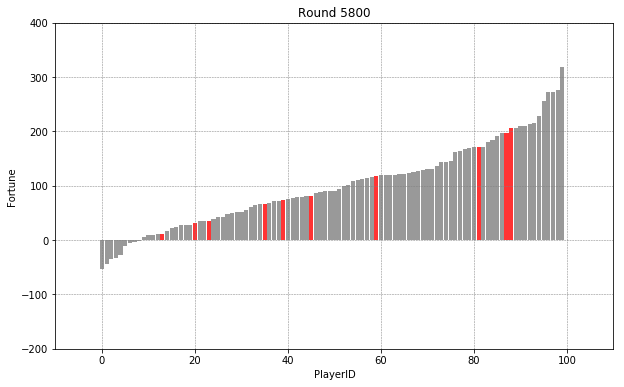

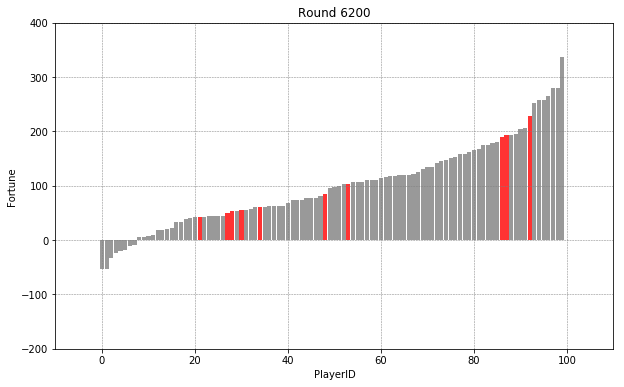

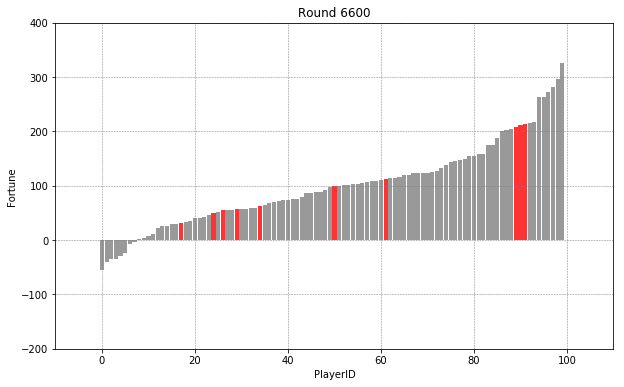

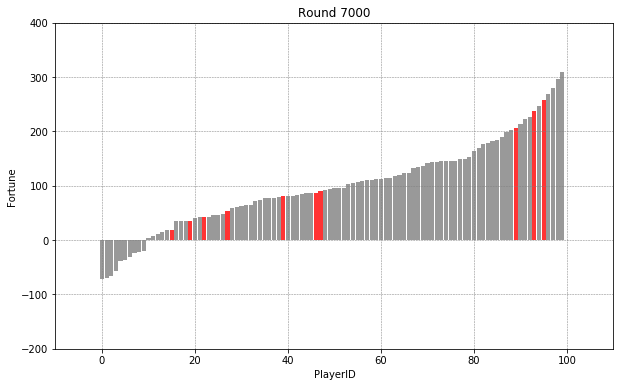

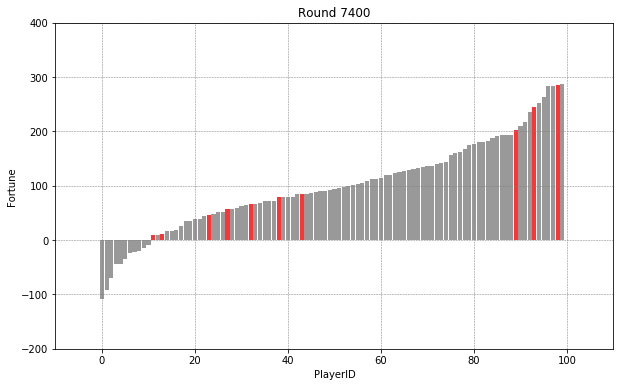

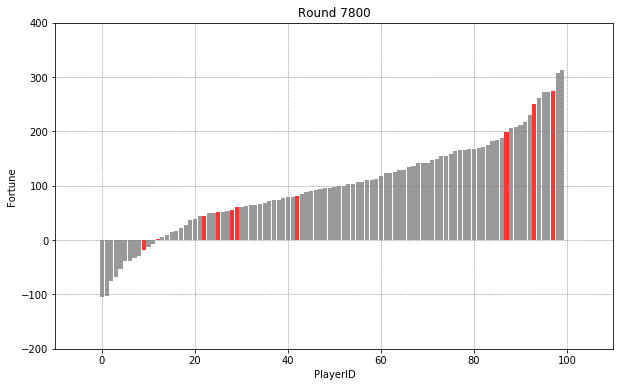

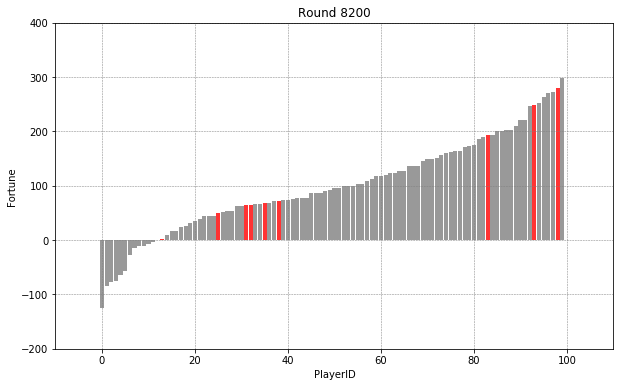

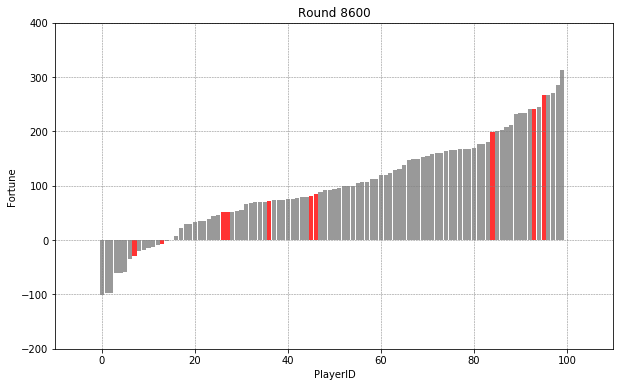

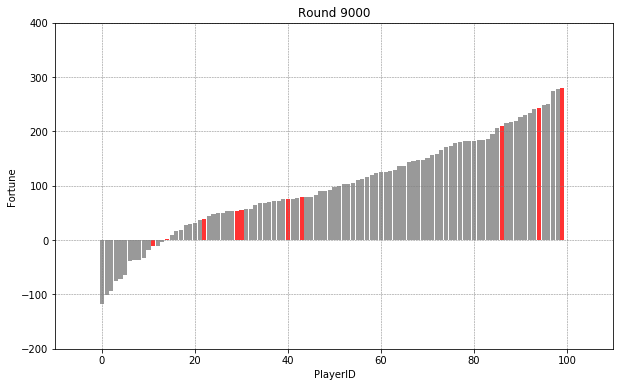

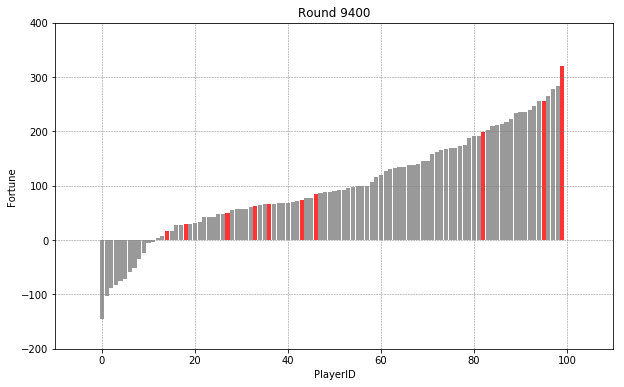

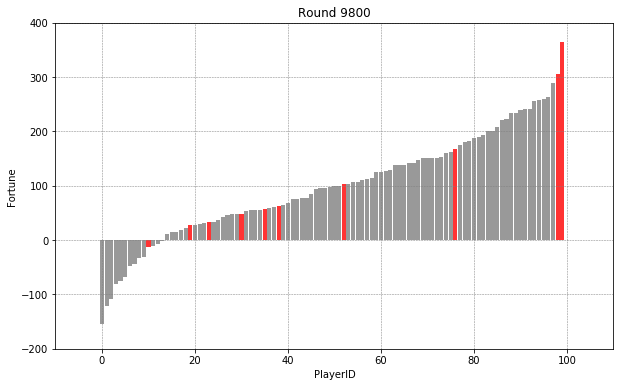

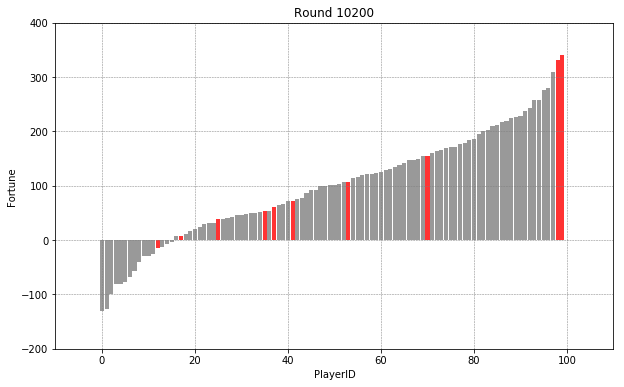

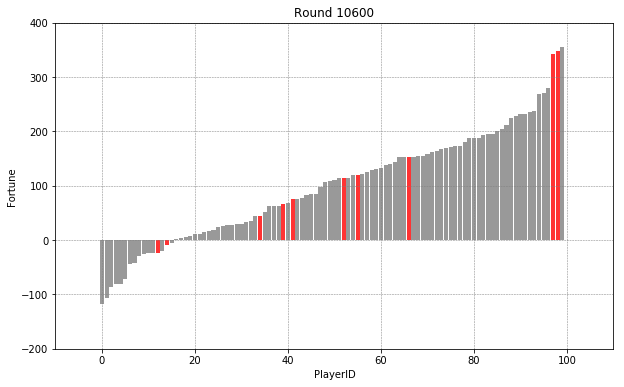

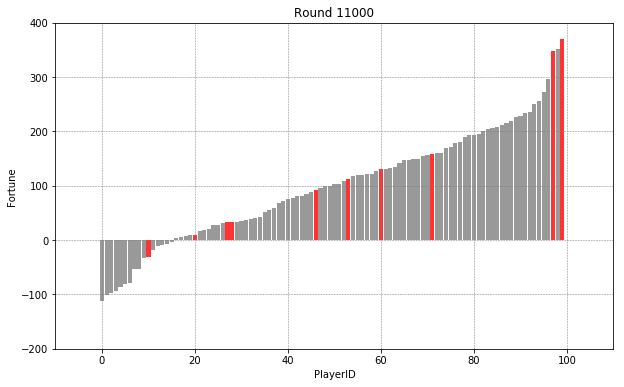

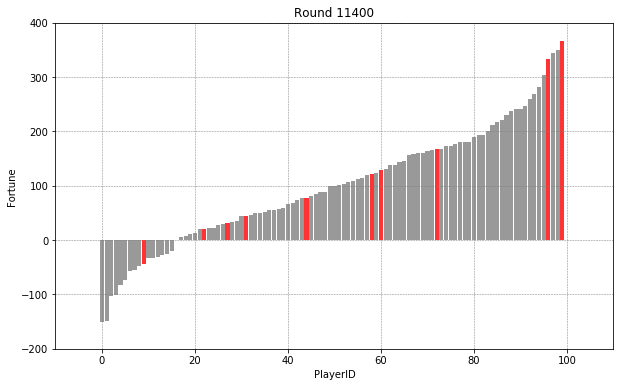

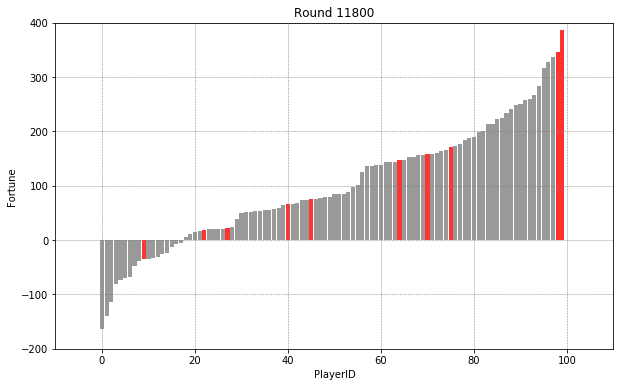

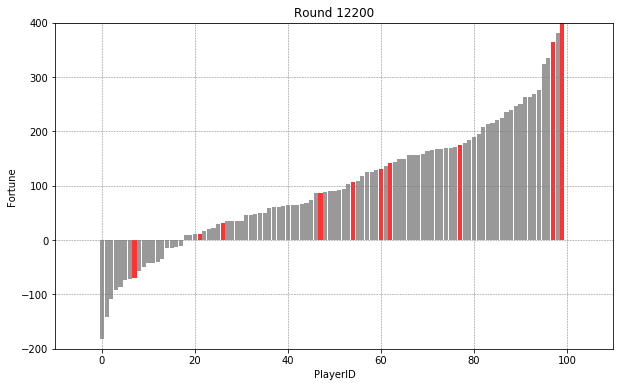

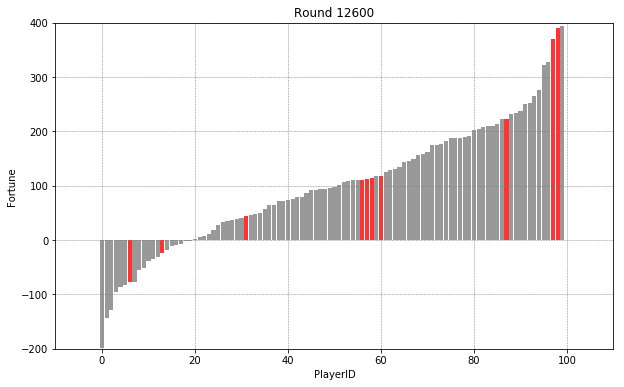

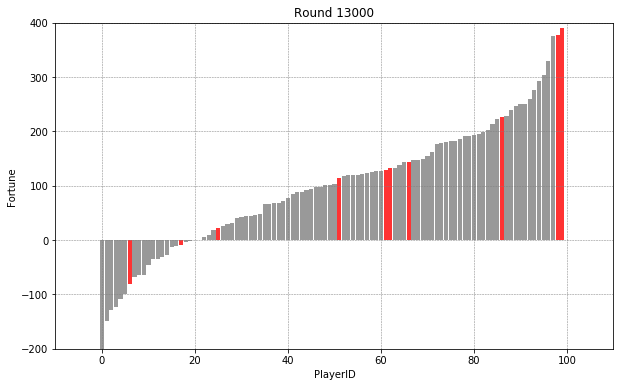

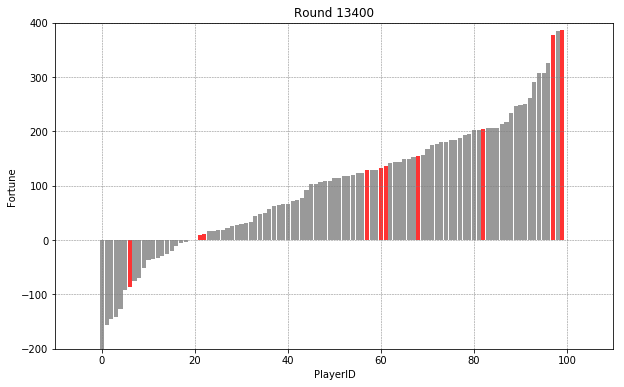

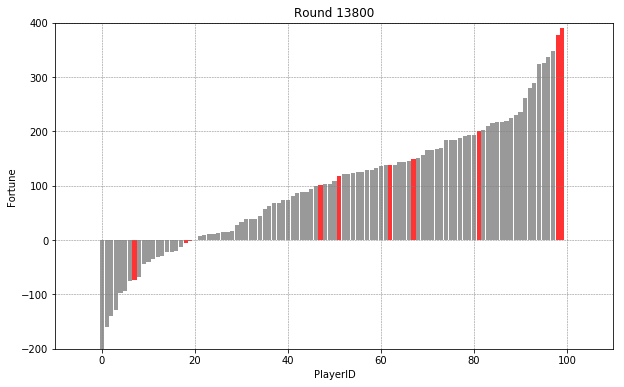

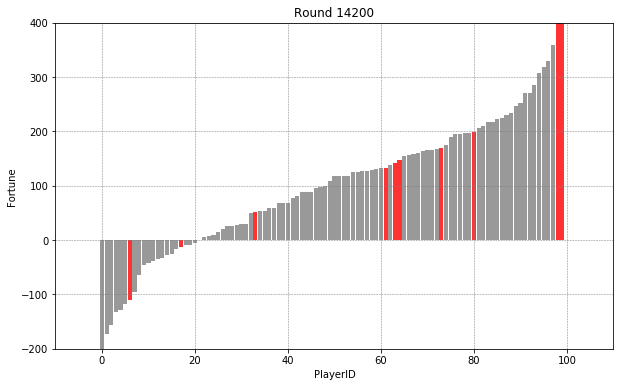

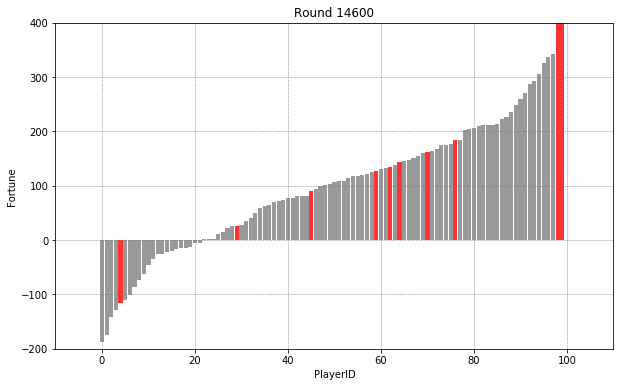

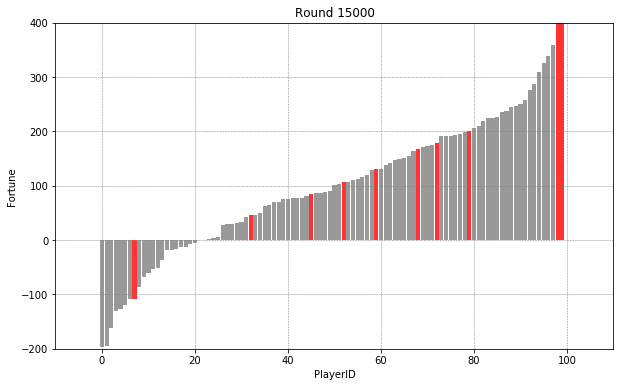

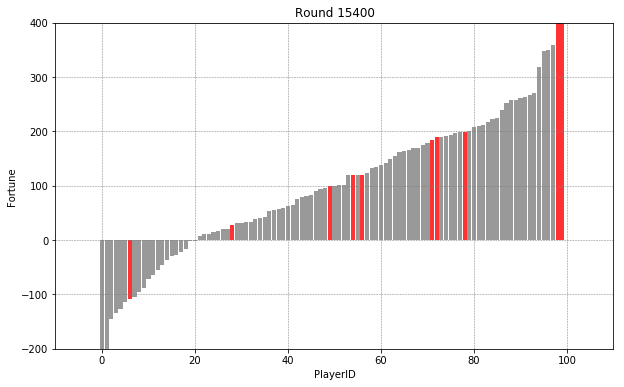

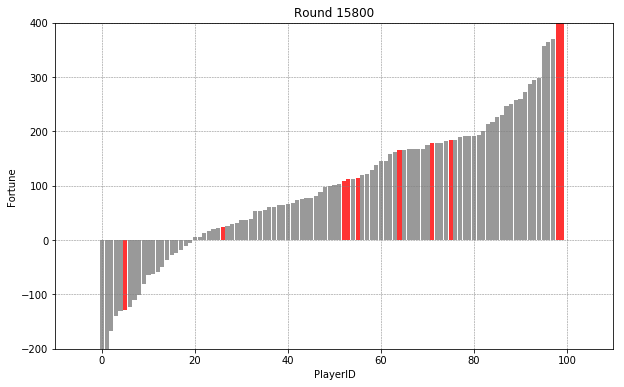

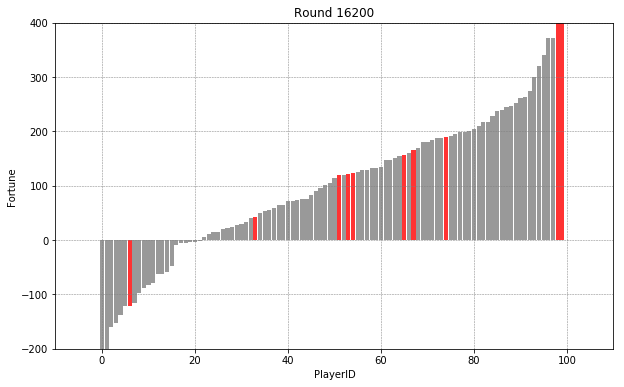

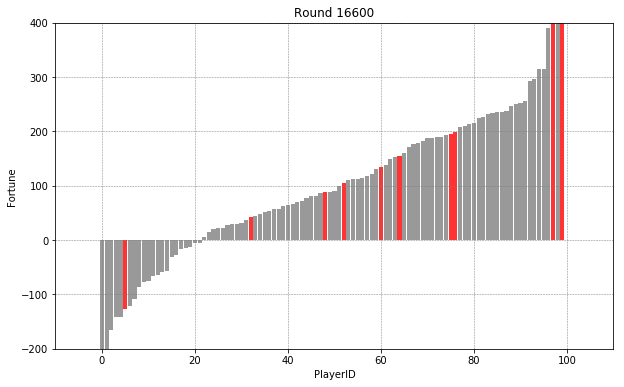

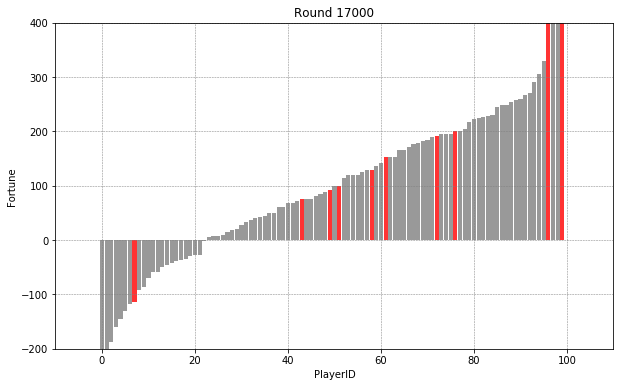

In [6]:


plt.figure(figsize = (10,6))
data0 = pd.DataFrame({'money':game3_result.iloc[0],'color':'gray'})
data0['color'].loc[[1,11,21,31,41,51,61,71,81,91]] = 'red'
plt.bar(data0.index,data0['money'],color=data0['color'],alpha = 0.8,width = 0.9)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.ylim((-200,400))
plt.xlim((-10,110))
plt.title('Round %d' % 0)
plt.xlabel('PlayerID')
plt.ylabel('Fortune')
plt.savefig('graph5_round_%d.png' % 0, dpi=200)
# 绘制起始图片
def graph5(data,start,end,length):
    for n in list(range(start,end,length)):
        datai = pd.DataFrame({'money':data.iloc[n],'color':'gray'})
        datai['color'].loc[[1,11,21,31,41,51,61,71,81,91]] = 'red'
        datai = datai.sort_values(by = 'money').reset_index()
        plt.figure(figsize = (10,6))
        plt.bar(datai.index,datai['money'],color=datai['color'],alpha = 0.8,width = 0.9)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.ylim((-200,400))
        plt.xlim((-10,110))
        plt.title('Round %d' % n)
        plt.xlabel('PlayerID')
        plt.ylabel('Fortune')
        plt.savefig('graph5_round_%d.png' % n, dpi=200)
# 创建绘图函数2
graph5(game3_result,10,100,10)
graph5(game3_result,100,1000,100)
graph5(game3_result,1000,17400,400)
